# **1. Carga de importaciones y Data set**

In [ ]:
#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificacion ----

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#----  Curva ROC y PR ----

from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

#---- Importaciones para el modelo de random forest Classification ----

from sklearn.ensemble import RandomForestClassifier

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


# **2.Preparcion de datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**



* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding


In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


- limitar las rondas que sean mayores 30 rondas

# **3. Modelo RandomForest Classifiacation**

### Conceptos basicos del modelo de Random  Forest

- Crearemos particiones o nodos en la - que se separaran de manera condicional.
- Nodo inicial: llamado es llamado raíz (root)

- Nodos internos: dividen los datos basandose en codiciones > o <. Pueden tener hijos o mas.

- Hojas: Donde no hay mas particiones


RandomForestClassifier scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Ingreso de las caracteristicas

In [ ]:
# Separate features and target
X = df_backup[['TeamStartingEquipmentValue','MatchKills','MatchAssists','Map']]
#X = df_backup[['RoundStartingEquipmentValue', 'MatchKills','RoundHeadshots','RLethalGrenadesThrown']]
#X = df_backup[['Map','Team','RoundStartingEquipmentValue']]
y = df_backup['MatchWinner']

### Separación de los datos: entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Creación del Modelo Random forest Classifier

In [ ]:
# otro modelo, variando hiperparámetros
# boostrap en true por defecto
model = RandomForestClassifier(n_estimators=200, class_weight="balanced",
                               max_features = 'log2', verbose=2, max_depth=14, #max_depth es de hasta donde queremos que cresta, hazme un bosque en donde el maximo de pronfundidad sea de 6
                               oob_score=True, random_state=42)
# a entrenar
model.fit(X_train, y_train)

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.9s


building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    8.0s


building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   10.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features='log2', n_estimators=200, oob_score=True,
                       random_state=42, verbose=2)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


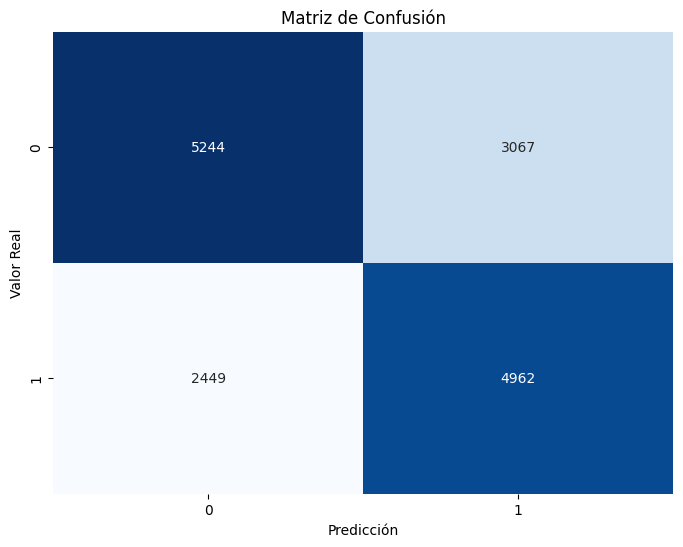

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

### Realizando predicciones

In [ ]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished


### Evaluación del modelo

In [ ]:
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[5244 3067]
 [2449 4962]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.68      0.63      0.66      8311
           1       0.62      0.67      0.64      7411

    accuracy                           0.65     15722
   macro avg       0.65      0.65      0.65     15722
weighted avg       0.65      0.65      0.65     15722


Accuracy Score:
0.649154051647373


### Calculando Sensitivity Y Specificity

In [ ]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.6695
Specificity: 0.6310


### Curva ROC

El valor de roc cuanto más cerca de 1, mejor. si fuera 0.5 daría igual que fuesen valores aleatorios y sería un mal modelo

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


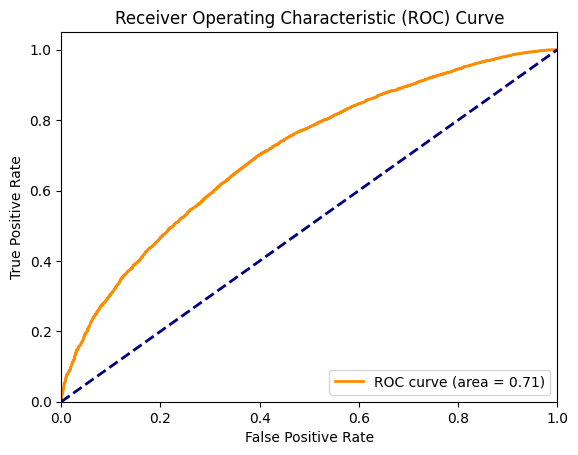

In [ ]:
# Calculate predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Curva PR

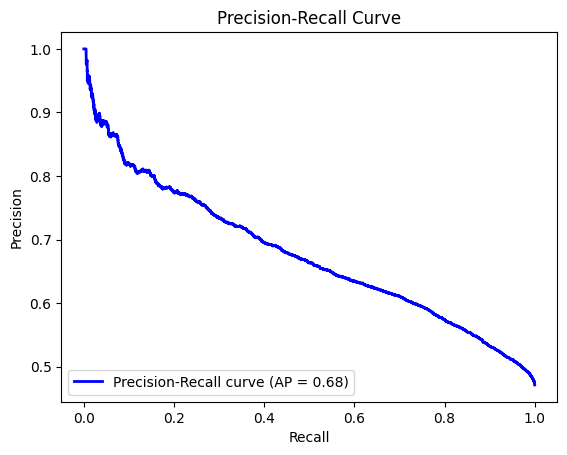

In [ ]:
# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### Grafico de experimento (ignorar)

/tmp/ipython-input-276-1303145928.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')


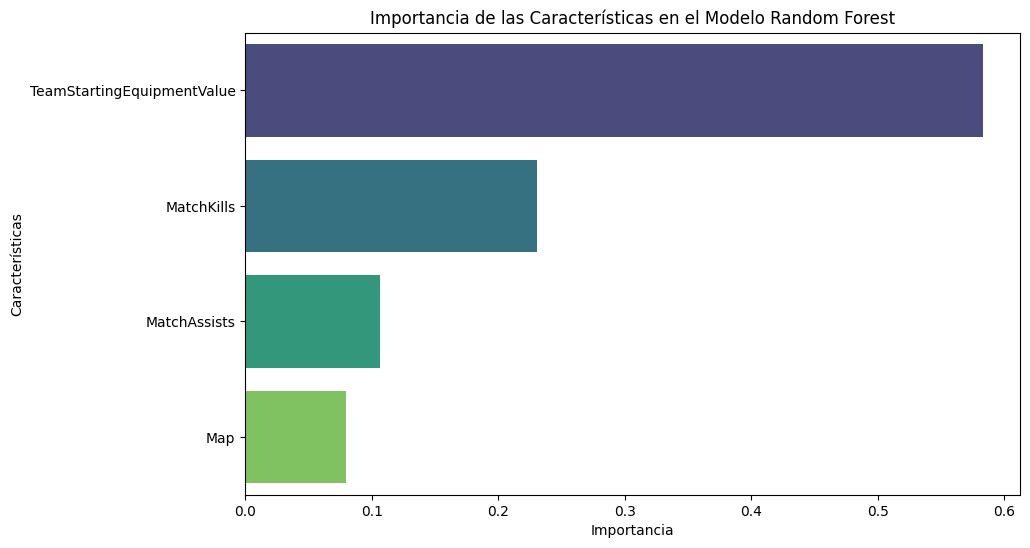

In [ ]:

feature_importances = model.feature_importances_

# Get the names of the features used in the model
features = X.columns

# Create a pandas Series to easily sort the importances
importance_series = pd.Series(feature_importances, index=features)

# Sort the features by importance
sorted_importance = importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


# **Uso de GridsearchCV**

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Get the best model
best_grid = grid_search.best_estimator_

# Make predictions with the best model
grid_predictions = best_grid.predict(X_test)

# Evaluate the best model
print("\nMatriz de Confusión (Grid Search):")
print(confusion_matrix(y_test, grid_predictions))

print("\nReporte de Clasificación (Grid Search):")
print(classification_report(y_test, grid_predictions))

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, grid_predictions))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}

Matriz de Confusión (Grid Search):
[[5548 2763]
 [2866 4545]]

Reporte de Clasificación (Grid Search):
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      8311
           1       0.62      0.61      0.62      7411

    accuracy                           0.64     15722
   macro avg       0.64      0.64      0.64     15722
weighted avg       0.64      0.64      0.64     15722


Accuracy Score (Grid Search):
0.6419666709070093


### Calculo de Sensitivity y Specificity con gridsearchcv

In [ ]:
cm_best = confusion_matrix(y_test, y_pred)
tn_best, fp_best, fn_best, tp_best = cm_best.ravel()

sensitivity_best = tp_best / (tp_best + fn_best)
specificity_best = tn_best / (tn_best + fp_best)

print("\nMétricas del mejor modelo de GridSearchCV:")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")


Métricas del mejor modelo de GridSearchCV:
Sensitivity: 0.6048
Specificity: 0.6582


### Curva ROC y curva PR usando el modelo de gridsearchCV

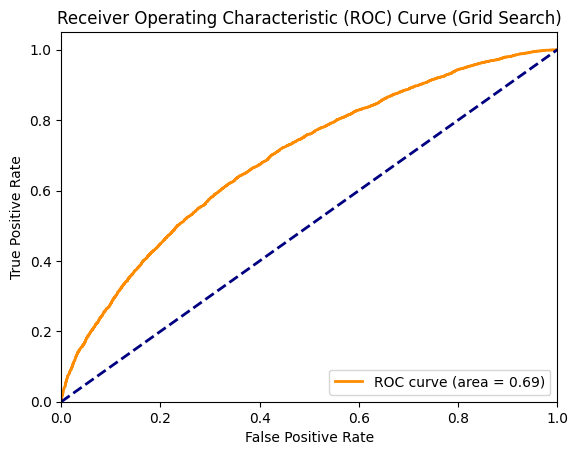

 -


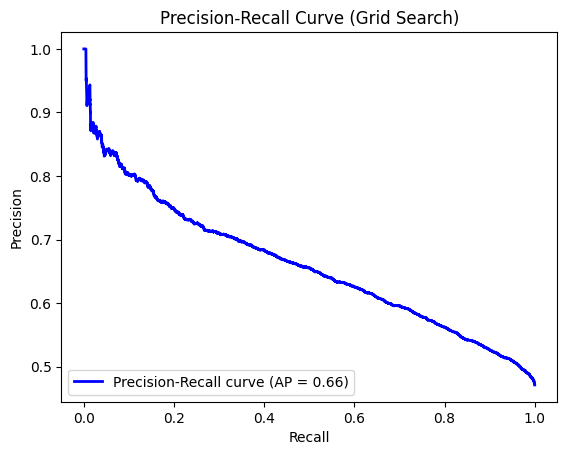

In [ ]:
grid_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calculate ROC curve using the best model
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, grid_pred_proba)

# Calculate AUC (Area Under the Curve) using the best model
roc_auc_grid = auc(fpr_grid, tpr_grid)

# Plot the ROC curve for the best model
plt.figure()
plt.plot(fpr_grid, tpr_grid, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_grid)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Grid Search)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision and recall for different thresholds using the best model
precision_grid, recall_grid, _ = precision_recall_curve(y_test, grid_pred_proba)

# Calculate the average precision score using the best model
average_precision_grid = average_precision_score(y_test, grid_pred_proba)
print(" -")
# Plot the Precision-Recall curve for the best model
plt.figure()
plt.plot(recall_grid, precision_grid, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_grid)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Grid Search)')
plt.legend(loc="lower left")
plt.show()

### Predicciones con el mejor modelo de GridsearchCV

In [ ]:
best_grid = grid_search.best_estimator_

# Make predictions with the best model
grid_predictions = best_grid.predict(X_test)

# Conclusión

- De todos los modelos realizados, el Random Forest Classifier obtuvo el mejor desempeño en la predicción de partidas ganadas y perdidas. Utilizando las características **TeamStartingEquipmentValue, MatchKills, MatchAssists y Map ** como variables, se obtuvieron los siguientes resultados: para la clase 0 se alcanzó una precisión de 0.68, un recall de 0.63 y un f1-score de 0.66, lo que representa un rendimiento aceptable. Para la clase 1, se logró una precisión de 0.62, un recall de 0.67 y un f1-score de 0.64.

El accuracy o exactitud del modelo fue de 0.65, o un 65% de predicciones correctas considerando todos los valores de la matriz de confusión, la cual fue la siguiente:

**Matriz de Confusión:**

[[5244 3067]

 [2449 4962]]

Sensitivity o la cantidad de casos positivos que el algorimo ha clasificado  **correctamente** con un valor de: 0.6695

Specificity o la cantidad de casos negativos que el algorimo ha clasificado **correctamente** con un valor de: 0.6310

Curva ROC: 0.71

Curva PR: 0.68


- En el uso del GridsearchCV para encontrar los mejores hiperparametros, Se obtuvo para la clase 0 una precision de 0.66, un recall de 0.67 y un f1-score de 0.66. Para la clase 1 una precision de 0.62 un recall de 0.61 y uun f1-score de 0.62. Siendo estos resultados un poco menor que el resultado del primer modelo.